In [4]:
import networkx as nx
import pickle
import gamms
import sys
import os
import importlib as imp

import lib.graph_utils as GRUTL
import lib.graph_visualizer as GRVIS
import lib.core as CORE
imp.reload(GRUTL)
imp.reload(GRVIS)
imp.reload(CORE)
from lib.core import *

In [5]:
GRAPH_PATH = os.path.join("data", "graphs", "")
RESOLUTIONS = [200]
GRAPH_SIZE = [200]
LOCATION = "West Point, New York, USA"

# Check if graph_path exists
if not os.path.exists(GRAPH_PATH):
    error(f"Graph path {GRAPH_PATH} does not exist")
    sys.exit(1)
else:
    success(f"Graph path {GRAPH_PATH} exists")

[2025-03-19 11:32:48.649083][../../../../../../../../var/folders/ys/8pbx50h51zs24jxpgb6wqmbh0000gn/T/ipykernel_29699/488071626.py::<module>] Success: Graph path data/graphs/ exists


[2025-03-19 11:32:48.654292][../../../../../../../../var/folders/ys/8pbx50h51zs24jxpgb6wqmbh0000gn/T/ipykernel_29699/906317822.py::<module>] Info: Generating graph with 200 nodes and resolution 200...
[2025-03-19 11:32:49.624686][../../../../../../../../var/folders/ys/8pbx50h51zs24jxpgb6wqmbh0000gn/T/ipykernel_29699/906317822.py::<module>] Success: Graph reduced from 490 to 200 nodes.
[2025-03-19 11:32:49.631014][../../../../../../../../var/folders/ys/8pbx50h51zs24jxpgb6wqmbh0000gn/T/ipykernel_29699/906317822.py::<module>] Success: Graph saved to data/graphs/graph_200_200.pkl with 200 nodes.
[2025-03-19 11:32:50.325659][lib/graph_visualizer.py::_visualize_static] Success: Static graph saved to data/image/graph_200_200.png


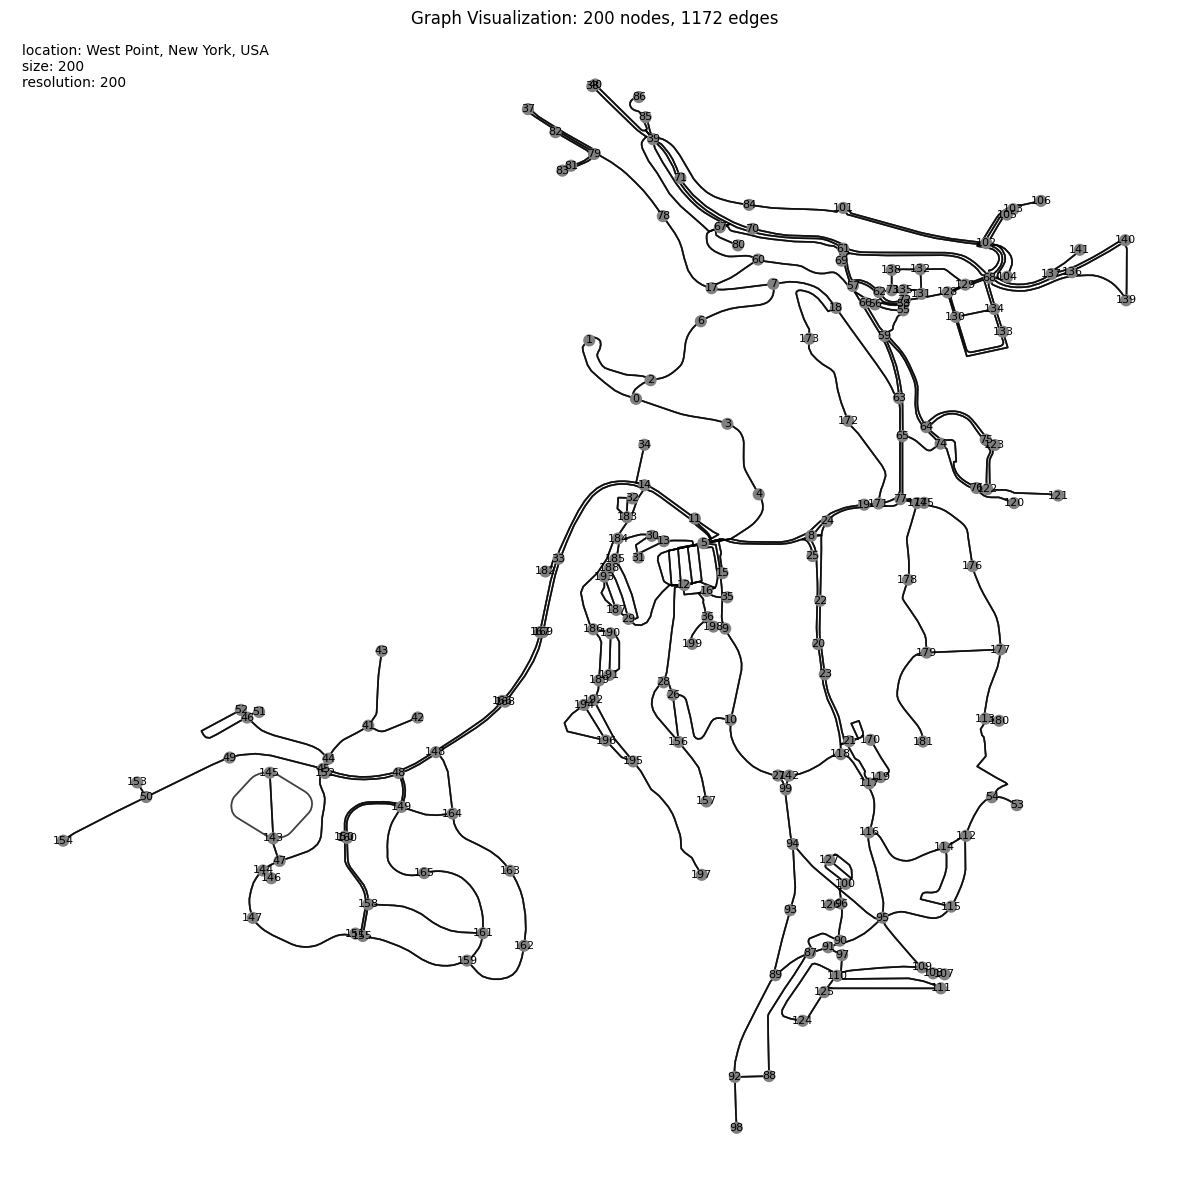

[2025-03-19 11:32:50.469685][../../../../../../../../var/folders/ys/8pbx50h51zs24jxpgb6wqmbh0000gn/T/ipykernel_29699/906317822.py::<module>] Success: Image path data/image/ exists, visualizing graph...


In [6]:
for resolution in RESOLUTIONS:
    for size in GRAPH_SIZE:
        info(f"Generating graph with {size} nodes and resolution {resolution}...")
        graph_path = GRAPH_PATH + f"graph_{size}_{resolution}.pkl"

        G = gamms.osm.create_osm_graph(LOCATION, resolution=resolution)
        # Check if G is a MultiDiGraph
        if not isinstance(G, nx.MultiDiGraph):
            warning(f"Graph is not a MultiDiGraph, converting...")
            G = GRUTL.cast_to_multidigraph(G, debug=True)

        if size is not None and len(G.nodes) > size:
            try:
                original_node_count = len(G.nodes)
                G = GRUTL.reduce_graph_to_size(G, size)
                success(f"Graph reduced from {original_node_count} to {len(G.nodes)} nodes.")
            except Exception as e:
                error(f"Error reducing graph: {e}")

        # Save the graph
        with open(graph_path, "wb") as f:
            pickle.dump(G, f)
        success(f"Graph saved to {graph_path} with {len(G.nodes)} nodes.")

        # Visualize the graph
        visual = GRVIS.GraphVisualizer(G=G, mode="static", extra_info={"location": LOCATION, "size": size, "resolution": resolution})
        IMAGE_PATH = os.path.join("data", "image", "")
        if not os.path.exists(IMAGE_PATH):
            error(f"Image path {IMAGE_PATH} does not exist")
            sys.exit(1)
        else:
            visual.visualize(save_path=os.path.join(IMAGE_PATH, f"graph_{size}_{resolution}.png"), transparent_background=False)
            success(f"Image path {IMAGE_PATH} exists, visualizing graph...")